In [29]:
using LinearAlgebra
using CairoMakie
using CurveFit
using CSV
using DataFrames

In [68]:
function get_slope(x, y)
    fit = linear_fit(log.(x), log.(y))
    slope = round(fit[2]; digits=4)
    return slope
end

get_slope (generic function with 1 method)

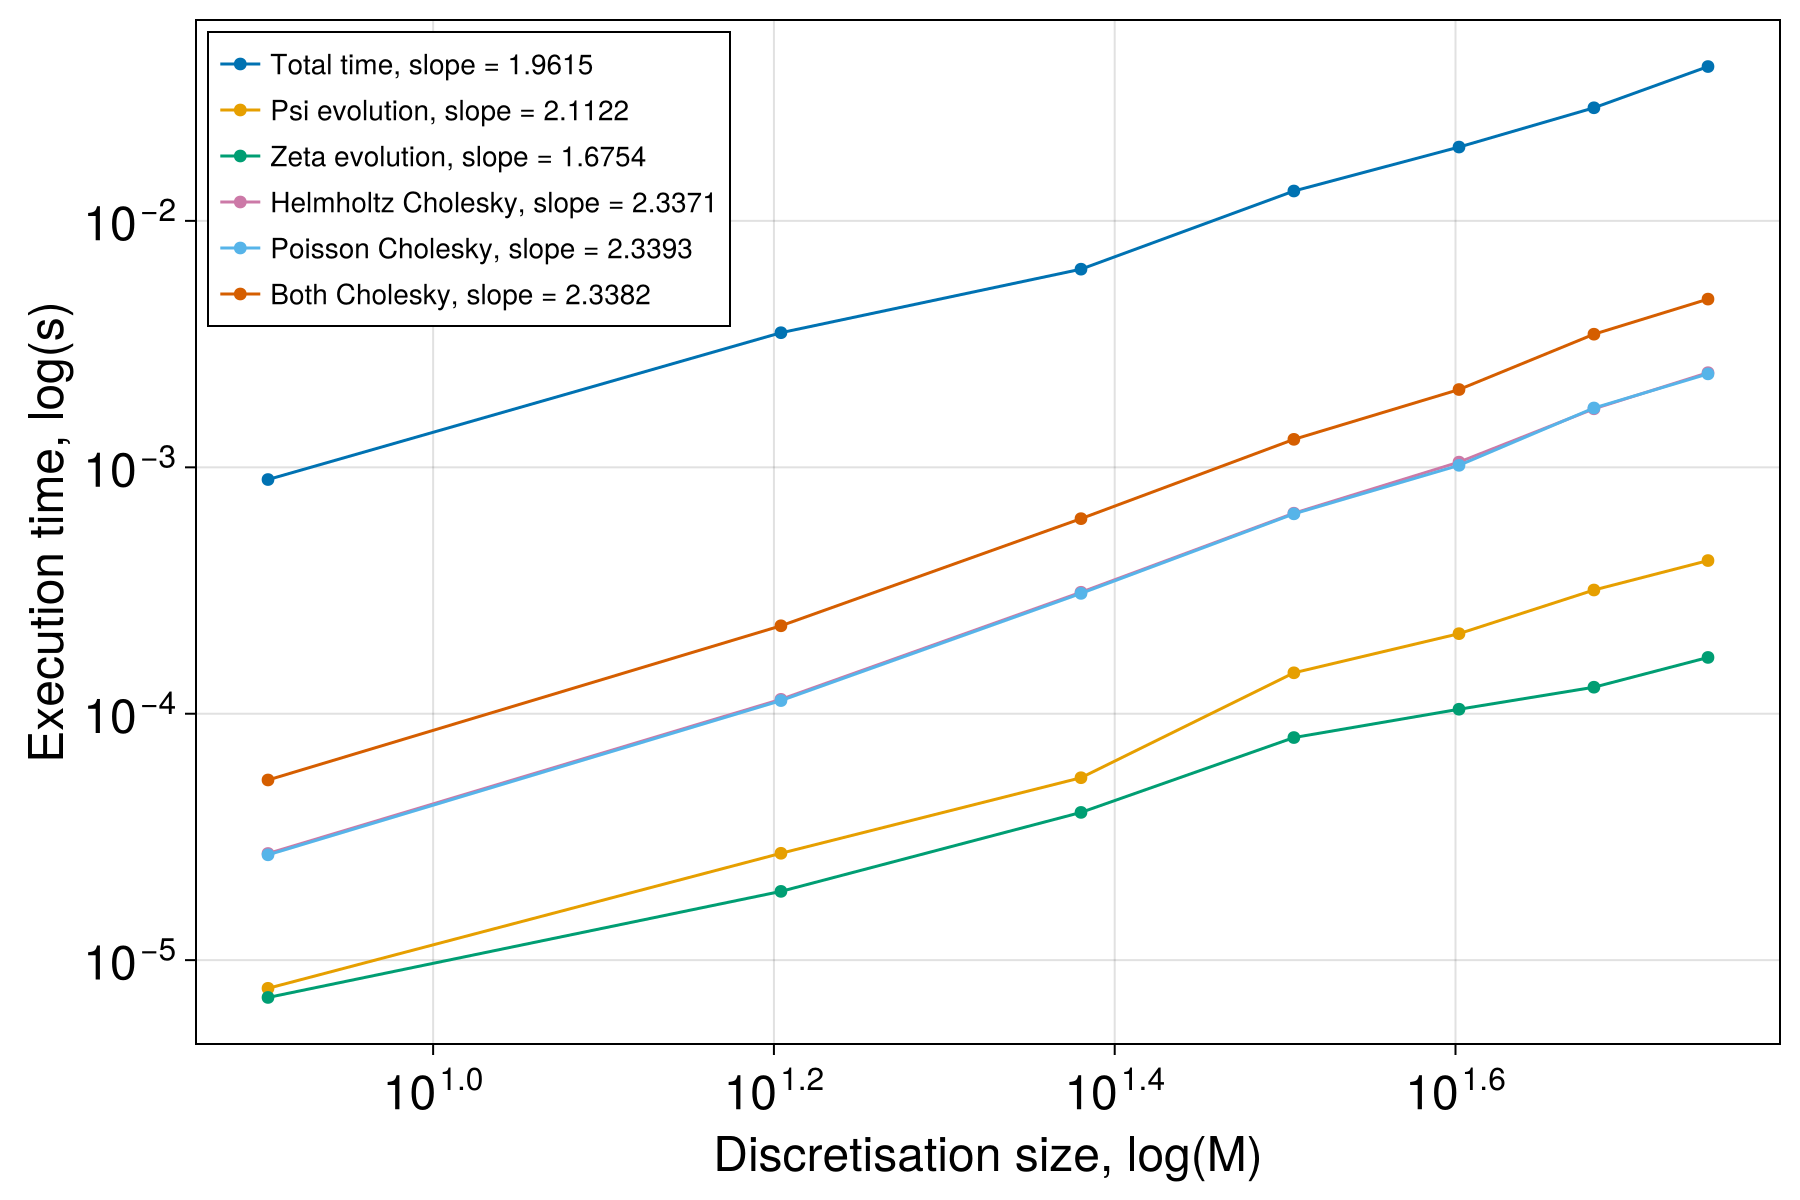

CairoMakie.Screen{IMAGE}


In [113]:
df = CSV.read("../../data/julia_parts_benchmark4.csv", DataFrame)

fig = Figure(size = (900, 600), figure_padding = 10)
ax = Axis(fig[1, 1], xscale=log10, yscale=log10, xlabel="Discretisation size, log(M)", ylabel="Execution time, log(s)")
# ax = Axis(fig[1, 1], xlabel="Discretisation Size (M)", ylabel="Runtime")

df[!, "Both Cholesky"] = df[:, 5] + df[:, 6]
x_values = df[1:7, 1]

expected_curve(x) = x^2
ideal_curve = expected_curve.(x_values)

for col in names(df)[2:end]  # Skip the first column (used as x-axis)
    fit = linear_fit(log.(x_values), log.(df[1:7, col]))
    slope = round(fit[2]; digits=4)
    scatterlines!(ax, x_values, df[1:7, col], label="$col, slope = $slope")
end

ax.xlabelsize = fontsize
ax.xticklabelsize = fontsize
ax.yticklabelsize = fontsize
ax.ylabelsize = fontsize

# Legend(fig[1, 1], ax, position = :lt, labelsize=fontsize)

axislegend(ax, position = :lt)
display(fig)
save("../../plots/julia_parts.png", fig)

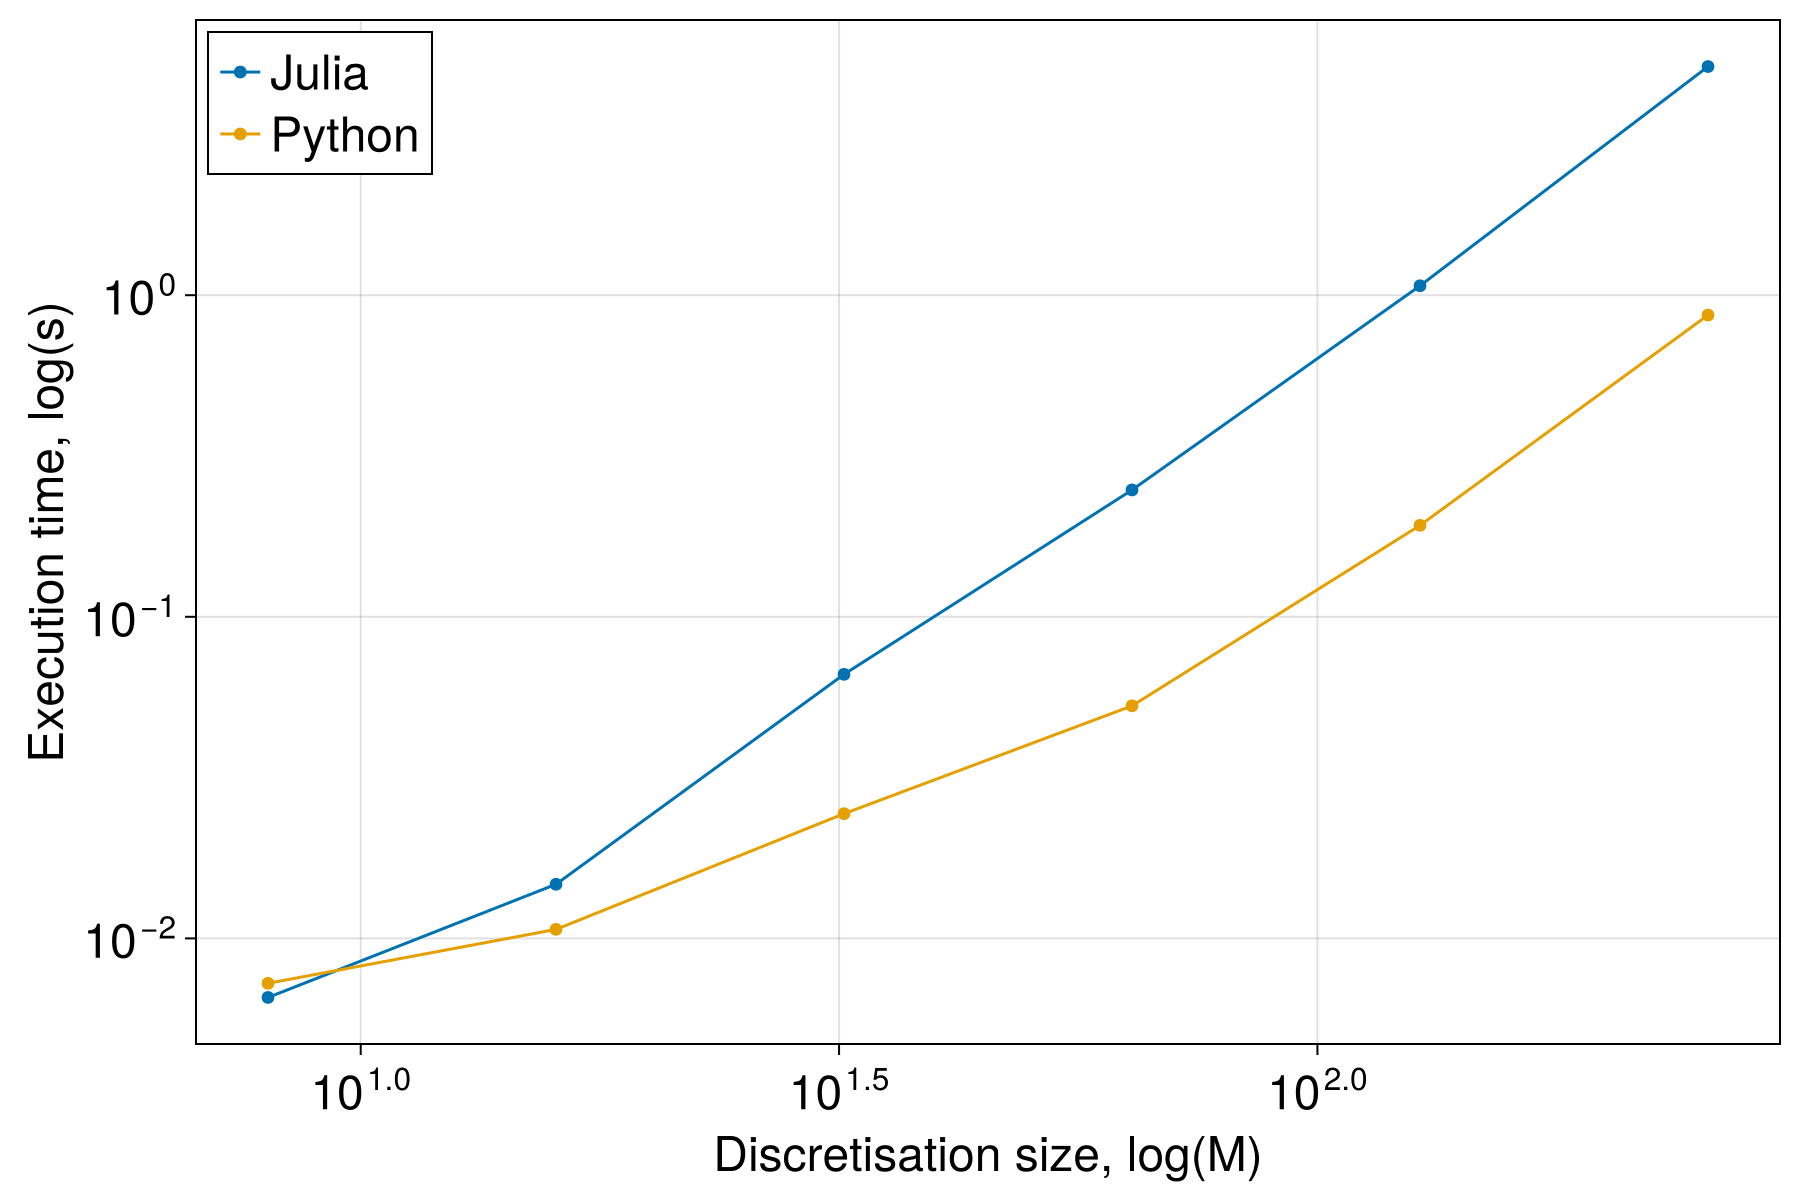

CairoMakie.Screen{IMAGE}


In [109]:
python_times = [0.003905, 0.004481, 0.005418, 0.006779, 0.008593, 0.01227, 0.01504, 0.01566]
julia_times = 1e-3 * [3.847, 5.200, 8.373, 14.897, 20.006, 27.236, 587.194, 605.065]

python_times2 = [0.007252, 0.010669, 0.024428, 0.0528688, 0.192472, 0.86733]
julia_times2 = 1e-3 * [6.553, 14.737, 66.247, 247.989, 1.070*1e3, 5.141*1e3]

fontsize = 24
M_list = [4, 8, 12, 16, 20, 24, 28, 32]
M_list2 = [8, 16, 32, 64, 128, 256]


python_slope = get_slope(M_list2[1:end-2], python_times2[1:end-2])
julia_slope = get_slope(M_list2[1:end-2], julia_times2[1:end-2])

fig = Figure(size = (900, 600), figure_padding = 10)
ga = fig[1, 1] = GridLayout()

ax = Axis(ga[1, 1], xlabel="Discretisation size, log(M)", ylabel="Execution time, log(s)", xscale=log10, yscale=log10)

ax.xlabelsize = fontsize
ax.xticklabelsize = fontsize
ax.yticklabelsize = fontsize
ax.ylabelsize = fontsize
# ax.legendlabelsize = fontsize

# scatterlines!(ax, M_list[1:end], julia_times[1:end], label="Julia")
scatterlines!(ax, M_list2[1:end], julia_times2[1:end], label="Julia")
scatterlines!(ax, M_list2[1:end], python_times2[1:end], label="Python")
axislegend(ax, position = :lt, labelsize=fontsize)
display(fig)

save("../../plots/bench_comp.png", fig)